In [ ]:
#ID NUMBER   : 190031094
#NAME        : Naveen  
#PRACTICAL   : #3 - Classification using Decision Tree Learning Model


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
# Changing categorical values into integers
spec = {'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}

df.Species = [spec[x] for x in df.Species]
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
import warnings
warnings.filterwarnings(action="ignore")

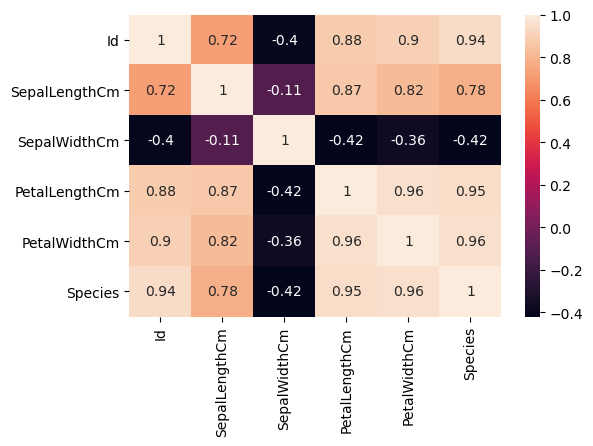

In [ ]:
plt.figure(dpi=100)
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

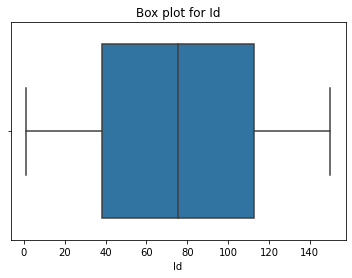

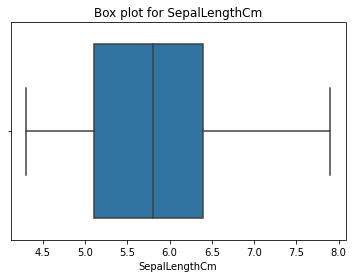

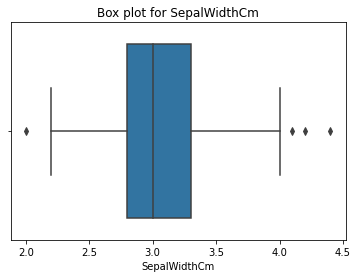

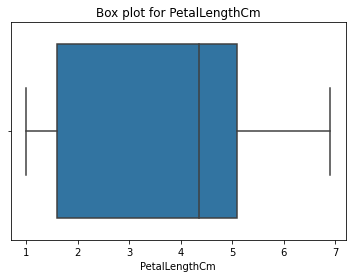

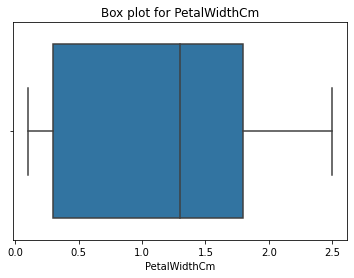

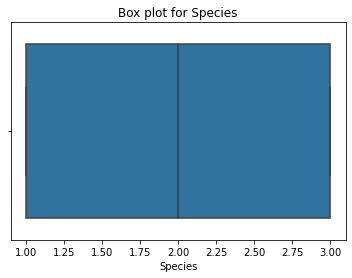

In [ ]:
for i in df.columns:
    plt.title("Box plot for "+ i)
    sns.boxplot(df[i])
    plt.show()

In [ ]:
# Splitting of the data

X = df.drop('Species',axis= 1)
Y = df.Species

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=4)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision tree with entropy 

clf_entropy = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=4, min_samples_leaf=5)
model = clf_entropy.fit(X_train,Y_train)

# prediction
y_pred = clf_entropy.predict(X_test)
y_pred

array([3, 1, 3, 3, 3, 2, 2, 1, 1, 3, 1, 1, 1, 2, 3, 1, 2, 1, 1, 3, 1, 3,
       2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2], dtype=int64)

In [ ]:
confusion_matrix(Y_test, y_pred)

array([[18,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 12]], dtype=int64)

In [ ]:
from sklearn import metrics
# Accuracy calculation

acc = metrics.accuracy_score(Y_test,y_pred)
acc_percentage = 100*acc

acc_percentage

100.0

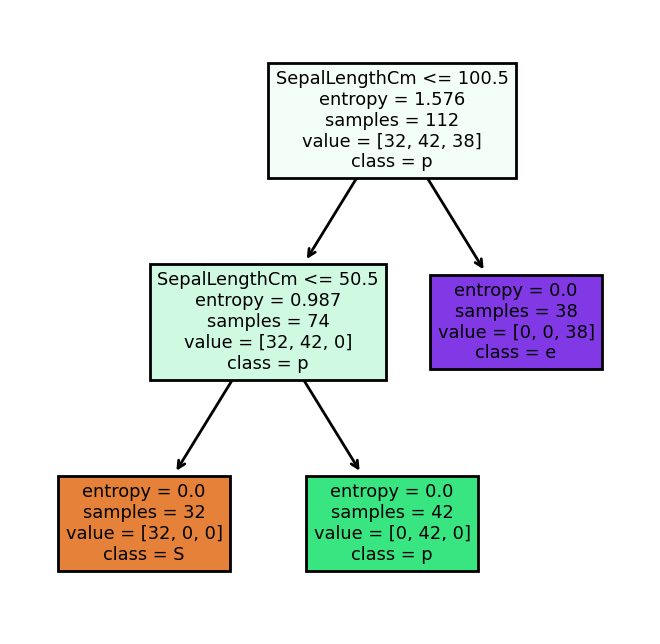

In [ ]:
# Plotting the tree
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn import tree

fns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(clf_entropy,
               feature_names = fns, 
               class_names= 'Species',
               filled = True);